In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
"""" WEATHER DATA PREPROCESSING """
transit_weather_data = pd.read_csv("data/Transit_Weather.csv")
transit_weather_data["date"] = pd.to_datetime(
    transit_weather_data["date"], format = "%Y-%m-%d"
).dt.date
transit_weather_data["start_time"] = pd.to_datetime(
    transit_weather_data["start_time"]
).dt.time

In [55]:
month_names = [
    "Dec",
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
# Find the correlation between the Unique Users and the Weather Attributes
weather_attributes = [
    "max_temperature",
    "avg_temperature",
    "min_temperature",
    "max_relative_humidity",
    "avg_relative_humidity",
    "min_relative_humidity",
    "max_wind_speed",
    "avg_wind_speed",
    "precipitation",
    "rain",
    "snow",
    "avg_visibility",
]
weather_correlation = list()

In [56]:
# Full Year
total_sessions = list(transit_weather_data.groupby('route')['session_id'].nunique().sort_values(ascending=False))[:2]

**SELECT THE ROUTE FOR WHICH THE ANALYSIS IS TO BE DONE**

In [57]:
route = "11S Prospect"

In [77]:
# Only August and September
route_specific_data = transit_weather_data
route_specific_data = route_specific_data[route_specific_data['route'].str.contains(route)]
# Plot Histogram of Unique Users: Uses between 0 and 27 times, 27 and 54 times, and more than 54 times
value_counts = route_specific_data['user_id'].value_counts().sort_index()
value_counts_df = pd.DataFrame({'user_id': value_counts.index, 'count': value_counts.values})
# Assign bins to account for the distribution of the data
bins = [0,20, 50,1000]
labels = ['0-20', '20-50', '50+']
# Create a new column with the Bin Labels
value_counts_df['unique_users_bin'] = pd.cut(value_counts_df['count'], bins=bins, labels=labels)

In [78]:
value_counts_df['unique_users_bin'].value_counts()

0-20     2228
20-50     481
50+       467
Name: unique_users_bin, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


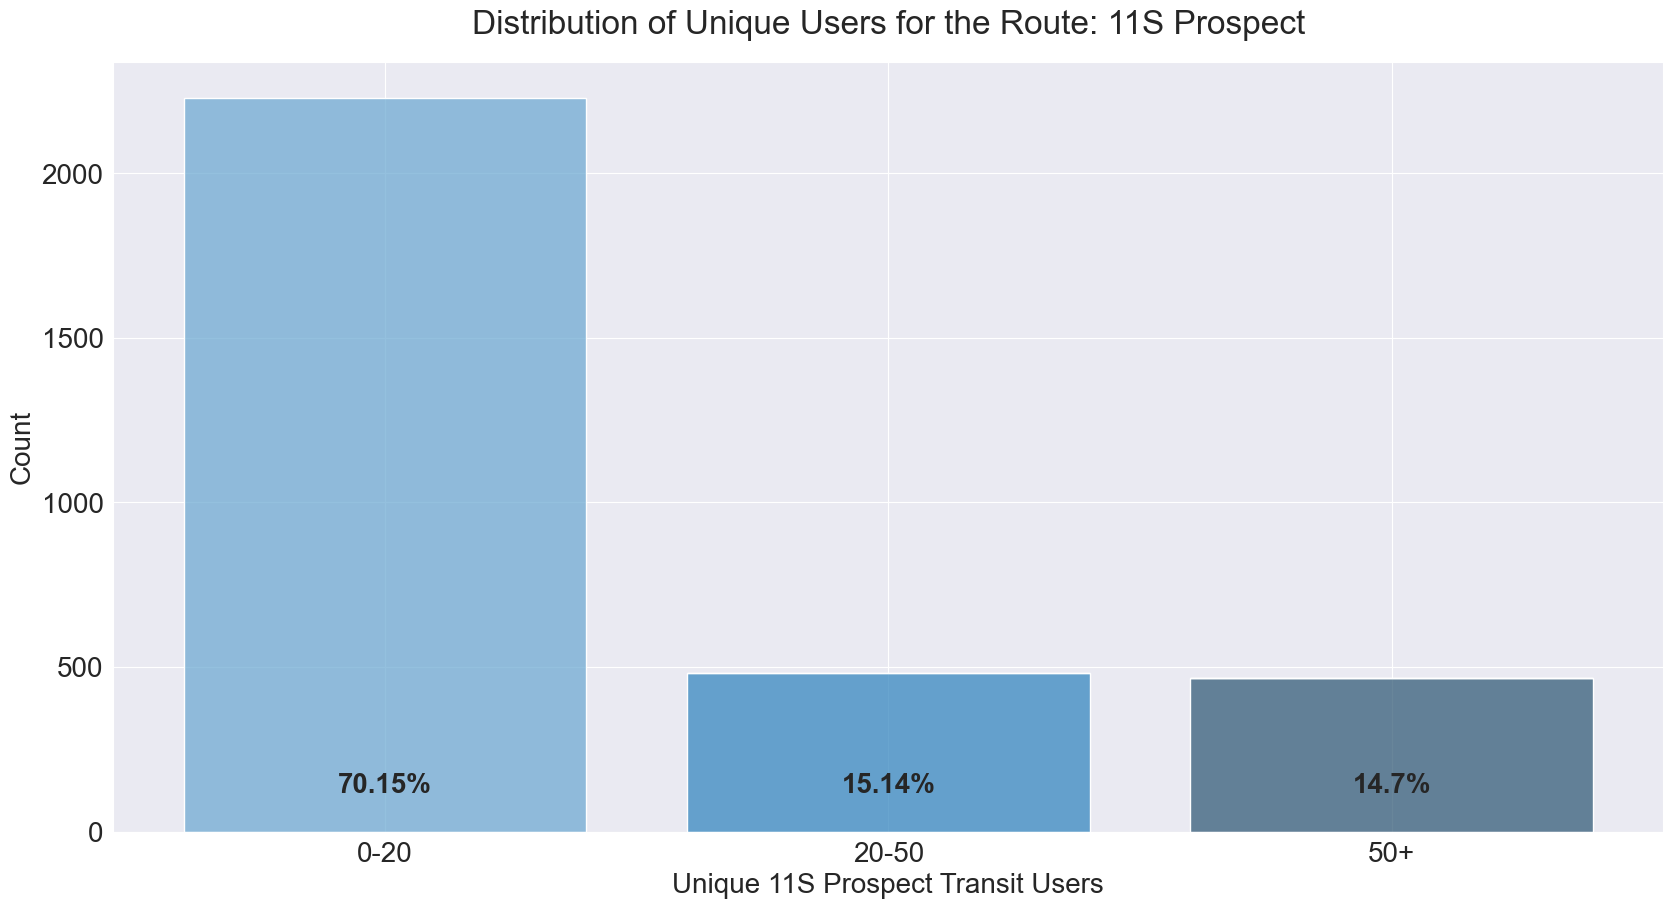

In [79]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({"font.size": 20})
plt.rcParams["axes.titlepad"] = 20
plt.title(f"Distribution of Unique Users for the Route: {route}")
sns.histplot(data=value_counts_df, x='unique_users_bin', hue='unique_users_bin', multiple='stack', shrink=0.8, palette='Blues_d')
# Print percentage out of total for each bin, at the Center of Each Bar
for index, row in value_counts_df.groupby('unique_users_bin').count().iterrows():
    plt.annotate(
        f"{round((row['user_id'] / value_counts_df.shape[0]) * 100, 2)}%",
        xy=(index, 0),
        xytext=(index, 100),
        textcoords="data",
        ha="center",
        va="bottom",
        fontsize=20,
        weight='bold',
    )
plt.xlabel(f"Unique {route} Transit Users")
plt.ylabel("Count")
plt.legend().set_visible(False)
plt.show()

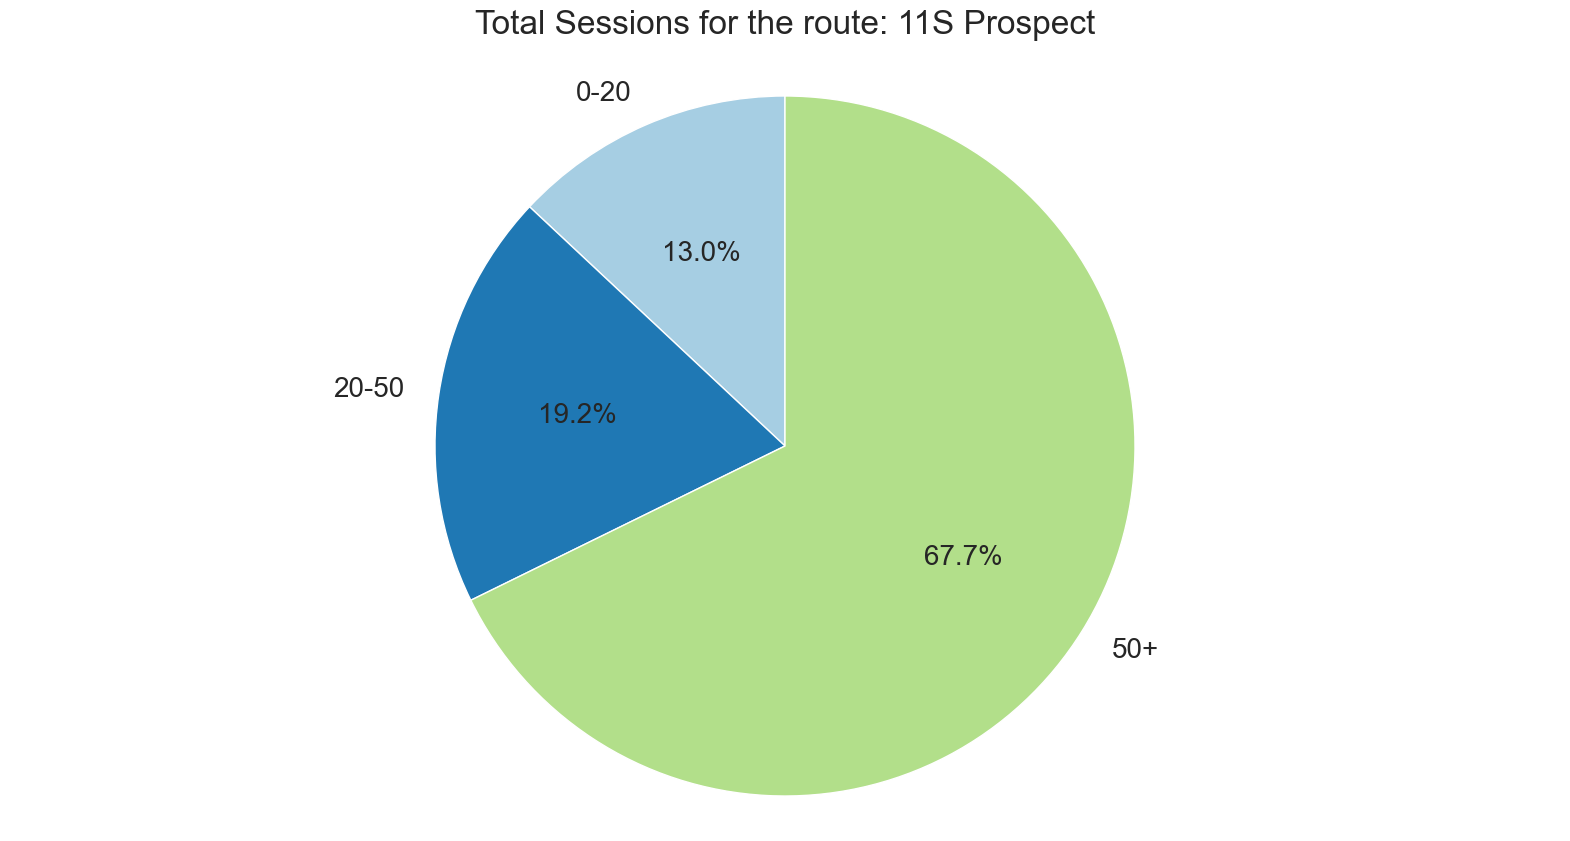

In [80]:
v = value_counts_df.groupby('unique_users_bin')
# Find the total sessions for Each Bin
total_sessions = v['count'].sum()
plt.figure(figsize=(20, 10))
plt.rcParams.update({"font.size": 20})
plt.rcParams["axes.titlepad"] = 20
plt.title(f"Total Sessions for the route: {route}")
plt.pie(total_sessions, labels=total_sessions.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Paired"))
plt.axis('equal')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


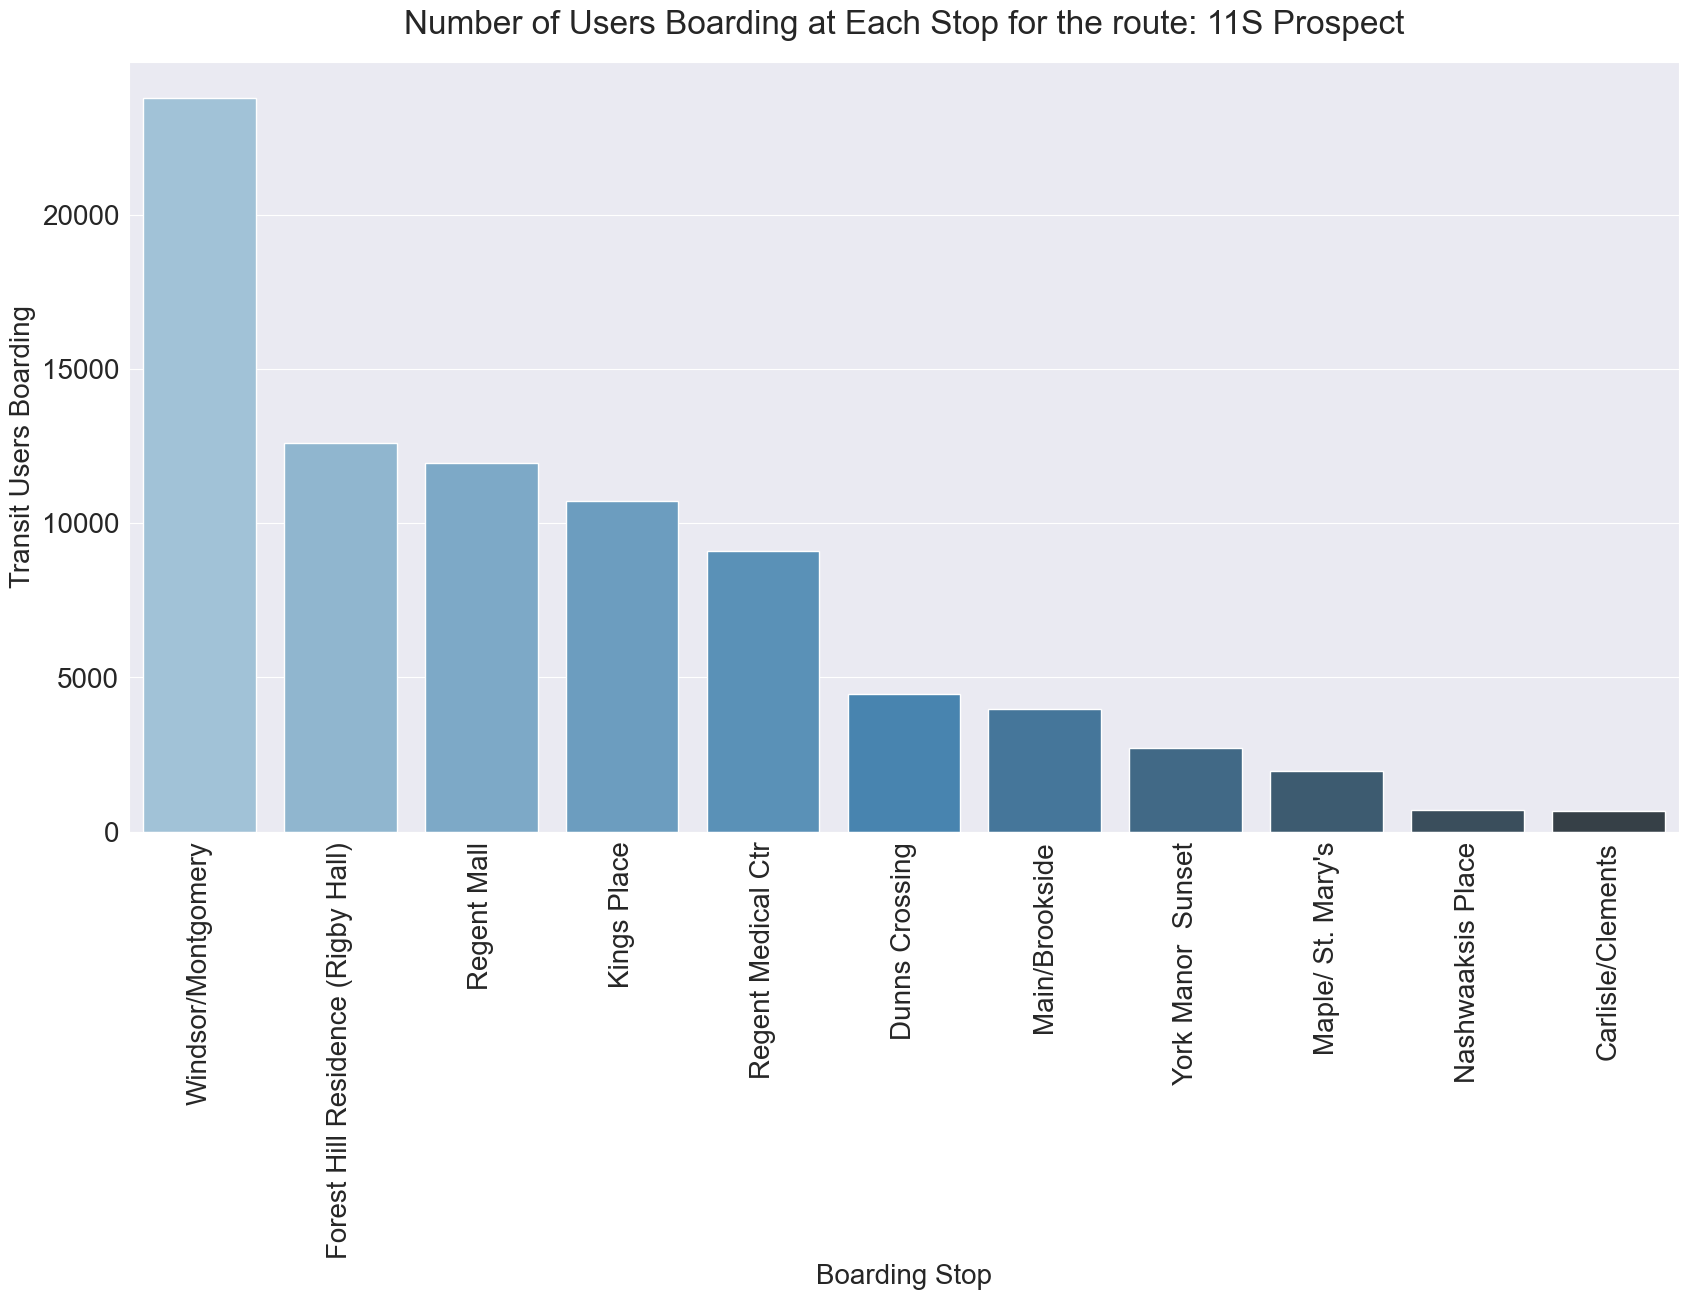

In [11]:
route_specific_data = transit_weather_data[transit_weather_data['route'].str.contains(route)]
# Plot a histogram of the number of users boarding at each stop
plt.figure(figsize=(20, 10))
plt.rcParams.update({"font.size": 20})
plt.rcParams["axes.titlepad"] = 20
plt.title(f"Number of Users Boarding at Each Stop for the route: {route}")
# Sort the boarding stops in descending order of the number of users boarding at each stop
boarding_stop_usage_counts = route_specific_data['boarding_stop'].value_counts().sort_values(ascending=False)
sns.barplot(x=boarding_stop_usage_counts.index, y=boarding_stop_usage_counts.values, palette='Blues_d')
plt.xlabel("Boarding Stop")
# Rotate the x-axis labels
plt.xticks(rotation=90)
plt.ylabel("Transit Users Boarding")
# Do not show the legend
plt.legend().set_visible(False)
plt.show()

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [13]:
X = transit_weather_data[weather_attributes]
y = transit_weather_data["total_sessions_daily"]

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create a Pipeline to impute missing values and train a Random Forest Classifier
pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("classifier", RandomForestClassifier(n_estimators=100)),
    ]
)
# Train the Pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('classifier', RandomForestClassifier())])

PRE-PROCESSING OF DATA

1. Missing Value Treatment

In [15]:
# STEP 1: PRE-PROCESSING: MISSING VALUE TREATMENT, FEATURE SELECTION, FEATURE SCALING & NORMALIZATION
# STEP 1.1: MISSING VALUE TREATMENT
# Import the necessary libraries for Missing Value Treatment
from sklearn.impute import SimpleImputer
# Perform Missing Value Treatment
# Define the model
imputer = SimpleImputer(strategy="median")
# Fit the model
imputer.fit(X_train)
# Apply the model
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

2. Feature Selection

2.1 Gini Method

max_temperature : 0.09726988296373901
avg_temperature : 0.10110541154232802
min_temperature : 0.10110068878891515
max_relative_humidity : 0.08935340952458969
avg_relative_humidity : 0.0966298716291619
min_relative_humidity : 0.09488426000725092
max_wind_speed : 0.09118230651016064
avg_wind_speed : 0.09498183958875003
precipitation : 0.05988300364502987
rain : 0.06938129783811073
snow : 0.026764454748838772
avg_visibility : 0.0774635732131252


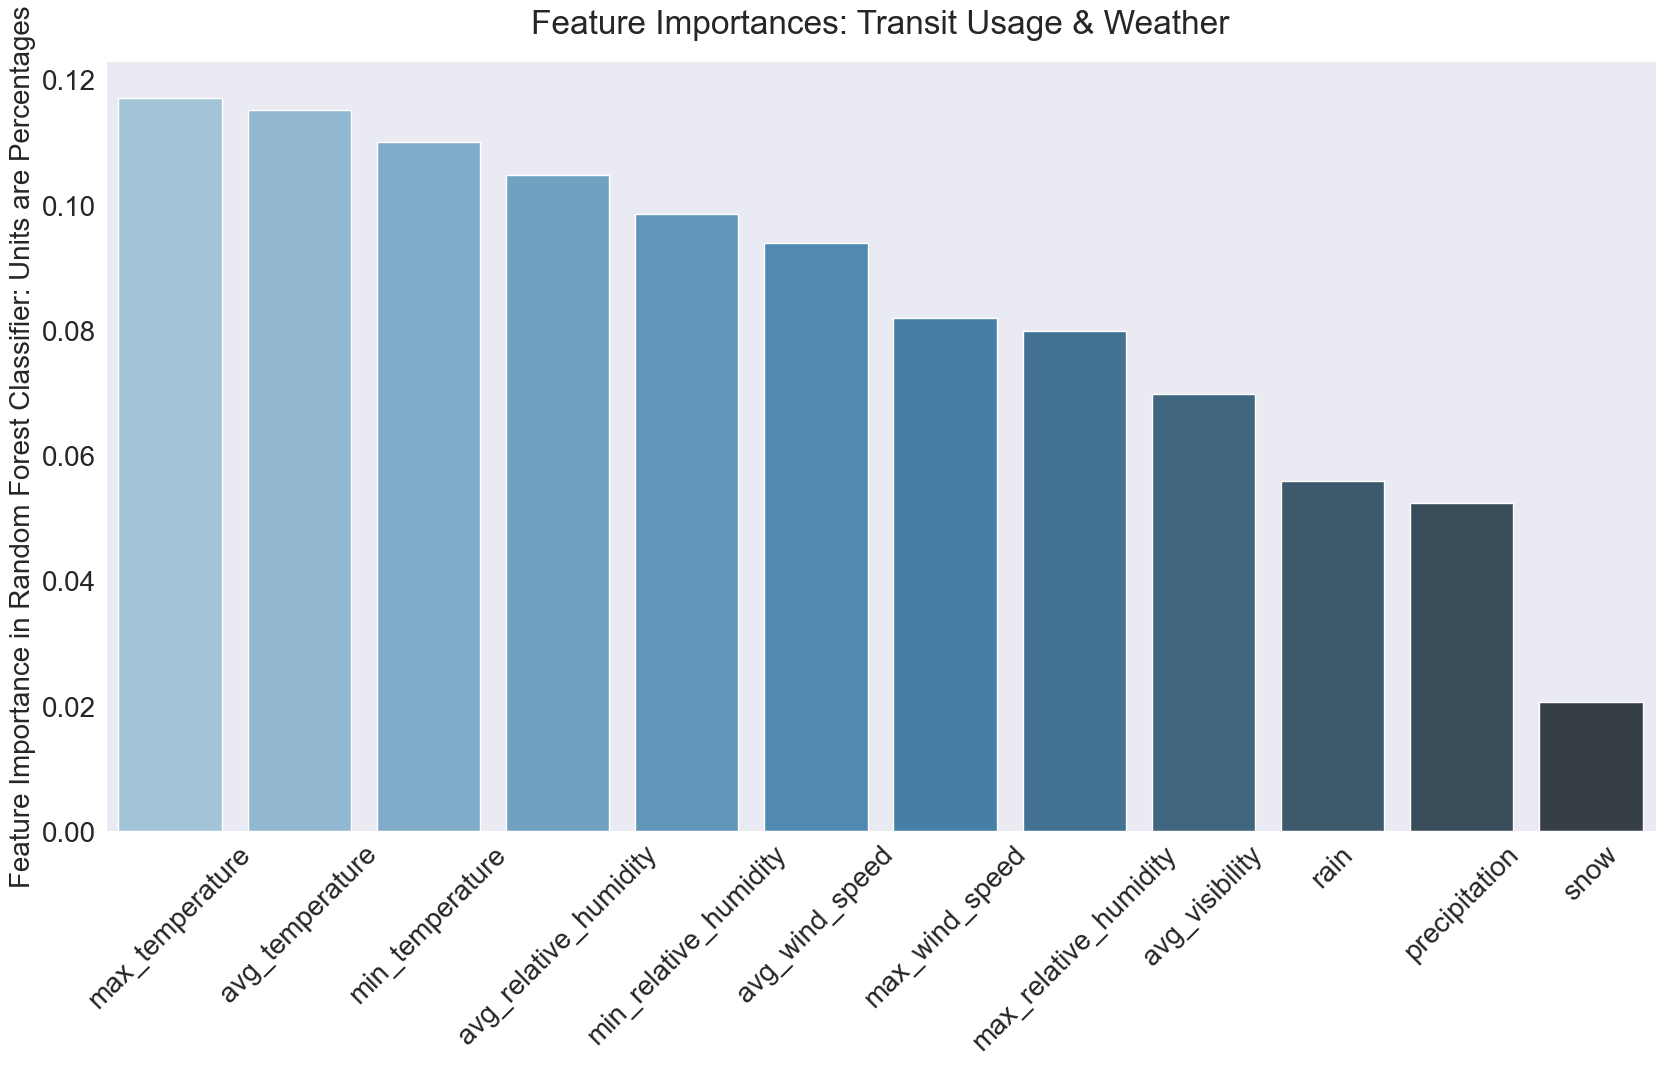

In [16]:
# STEP 1.2: FEATURE SELECTION
# Method 1: Perform Gini Method for Feature Selection
# Import the necessary libraries for Feature Selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
# Perform Gini Method for Feature Selection
# Define the model
model = ExtraTreesClassifier()
# Fit the model
model.fit(X_train, y_train)
# Display the feature : feature importance
for feature, importance in zip(weather_attributes, model.feature_importances_):
    print(f"{feature} : {importance}")

# Get the feature importances from the Random Forest Classifier
feature_importances = pipeline.named_steps["classifier"].feature_importances_
# Create a DataFrame with the feature importances
feature_importances_df = pd.DataFrame(
    {"feature": weather_attributes, "importance": feature_importances}
)
# Sort the DataFrame in descending order of importance
feature_importances_df.sort_values(by="importance", ascending=False, inplace=True)
# Plot the feature importances
plt.figure(figsize=(20, 10))
plt.rcParams.update({"font.size": 20})
plt.rcParams["axes.titlepad"] = 20
plt.title("Feature Importances: Transit Usage & Weather")
sns.barplot(x="feature", y="importance", data=feature_importances_df, palette='Blues_d')
# Show grid lines, only on the y-axis
plt.grid(axis='y')
plt.ylabel("Feature Importance in Random Forest Classifier: Units are Percentages")
# Do not label the x-axis
plt.xlabel("")
# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.show()

Based on the feature importances, we can see that the maximum temperature is the most important feature, followed by the minimum temperature and the maximum temperature. The average relative humidity is the least important feature.

2.2 Correlation Analysis

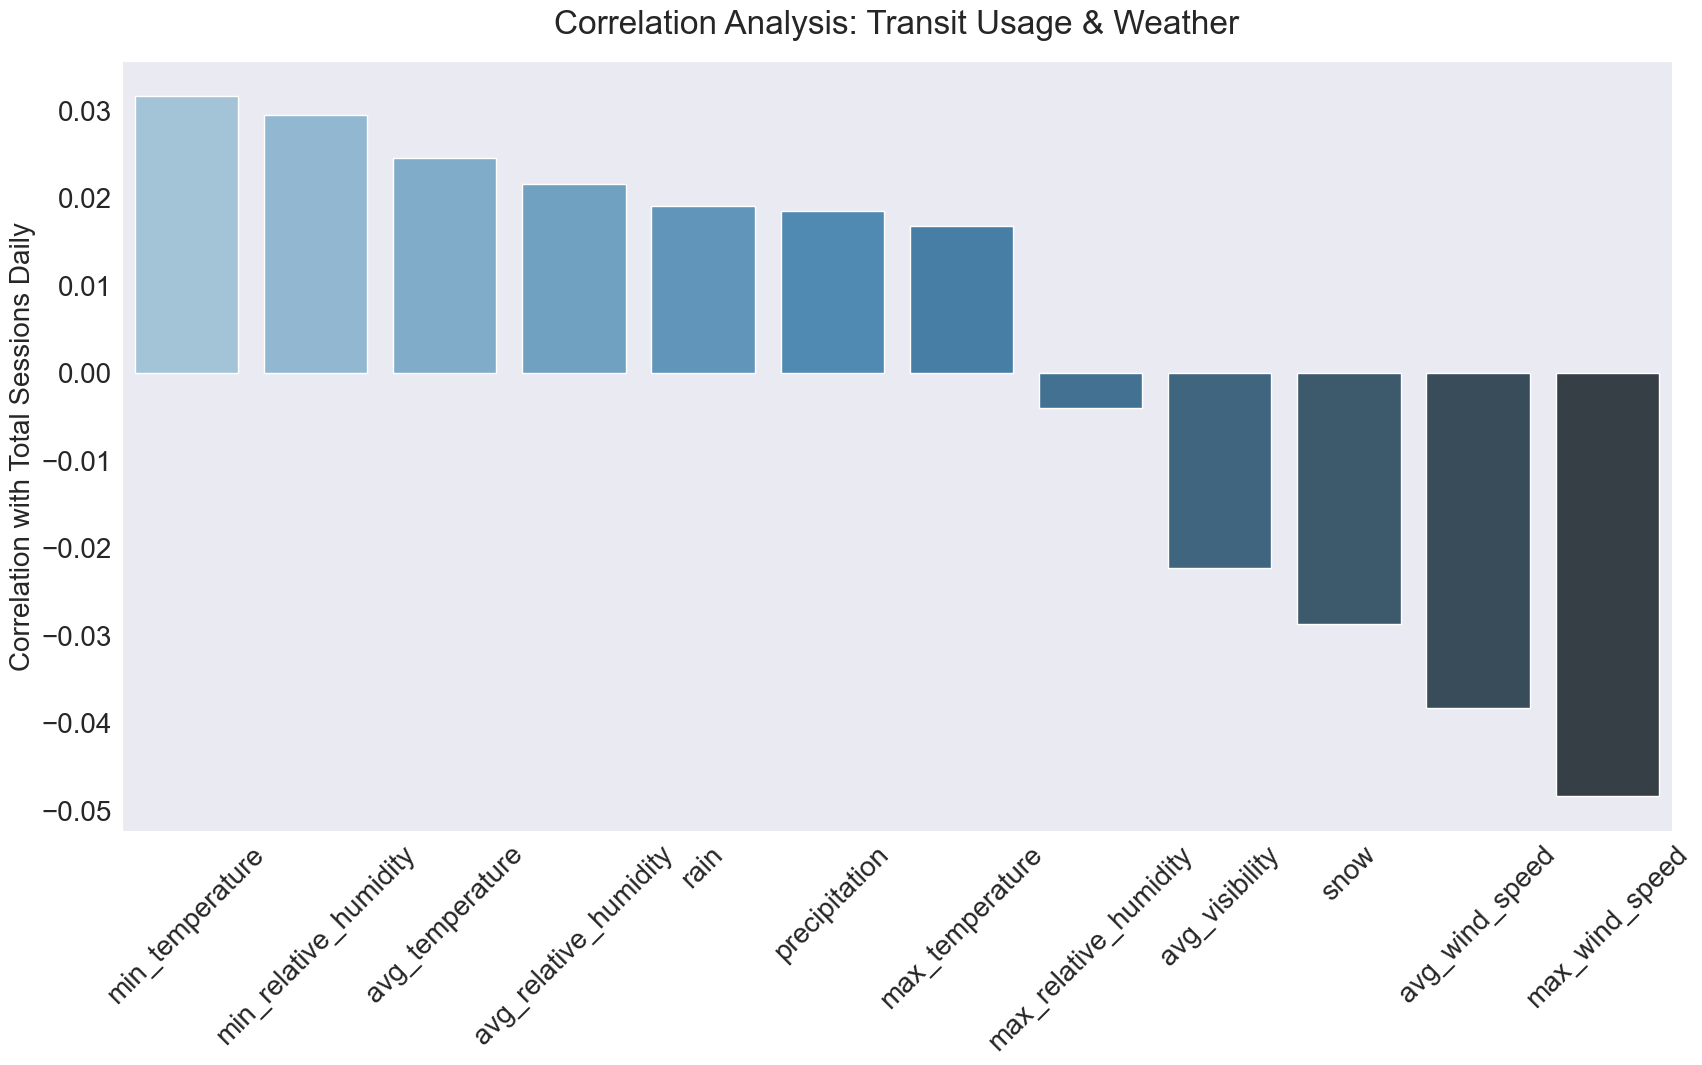

In [17]:
# Method 2: Correlation Analysis for Feature Selection
# Import the necessary libraries for Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt
# Perform Correlation Analysis for Feature Selection
# Create a DataFrame with the features and the target variable
transit_weather_data = pd.concat([X, y], axis=1)
# Find the correlation between the target variable and all of the remaining features
correlation = transit_weather_data.corr()
# Plot as a Bar Chart in descending order of correlation, remove the target variable
plt.figure(figsize=(20, 10))
plt.rcParams.update({"font.size": 20})
plt.rcParams["axes.titlepad"] = 20
plt.title("Correlation Analysis: Transit Usage & Weather")
sns.barplot(x=correlation["total_sessions_daily"].sort_values(ascending=False).index[1:], y=correlation["total_sessions_daily"].sort_values(ascending=False).values[1:], palette='Blues_d')
# Show grid lines, only on the y-axis
plt.grid(axis='y')
plt.ylabel("Correlation with Total Sessions Daily")
# Do not label the x-axis
plt.xlabel("")
# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.show()

In [31]:
route_specific_data

,date,day,month,year,week_of_year,month_year,season,route,boarding_stop,start_time,...,avg_weekly_wind_speed,avg_monthly_wind_speed,avg_weekly_precipitation,avg_monthly_precipitation,avg_weekly_rain,avg_monthly_rain,avg_weekly_snow,avg_monthly_snow,avg_weekly_visibility,avg_monthly_visibility
30,2021-03-29,29,3,2021,13,Mar-2021,Winter,11S Prospect,Forest Hill Residence (Rigby Hall),11:19:01,...,15.97,15.42,4.60,2.33,4.08,0.42,0.33,0.6,11620.37,13191.47
31,2021-03-29,29,3,2021,13,Mar-2021,Winter,11S Prospect,Windsor/Montgomery,14:25:03,...,15.97,15.42,4.60,2.33,4.08,0.42,0.33,0.6,11620.37,13191.47
32,2021-03-29,29,3,2021,13,Mar-2021,Winter,11S Prospect,Forest Hill Residence (Rigby Hall),17:22:39,...,15.97,15.42,4.60,2.33,4.08,0.42,0.33,0.6,11620.37,13191.47
33,2021-03-29,29,3,2021,13,Mar-2021,Winter,11S Prospect,Windsor/Montgomery,13:24:14,...,15.97,15.42,4.60,2.33,4.08,0.42,0.33,0.6,11620.37,13191.47
34,2021-03-29,29,3,2021,13,Mar-2021,Winter,11S Prospect,Regent Mall,12:05:46,...,15.97,15.42,4.60,2.33,4.08,0.42,0.33,0.6,11620.37,13191.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367526,2022-09-18,18,9,2022,37,Sep-2022,Fall,11S Prospect,Windsor/Montgomery,11:55:29,...,13.61,11.89,1.06,3.54,2.09,4.74,0.00,0.0,12736.70,12147.97
367527,2022-09-18,18,9,2022,37,Sep-2022,Fall,11S Prospect,Nashwaaksis Place,12:51:32,...,13.61,11.89,1.06,3.54,2.09,4.74,0.00,0.0,12736.70,12147.97
367531,2022-09-11,11,9,2022,36,Sep-2022,Fall,11S Prospect,Kings Place,19:06:05,...,8.63,11.89,2.87,3.54,6.26,4.74,0.00,0.0,11060.13,12147.97
367532,2022-09-11,11,9,2022,36,Sep-2022,Fall,11S Prospect,Regent Medical Ctr,18:01:49,...,8.63,11.89,2.87,3.54,6.26,4.74,0.00,0.0,11060.13,12147.97


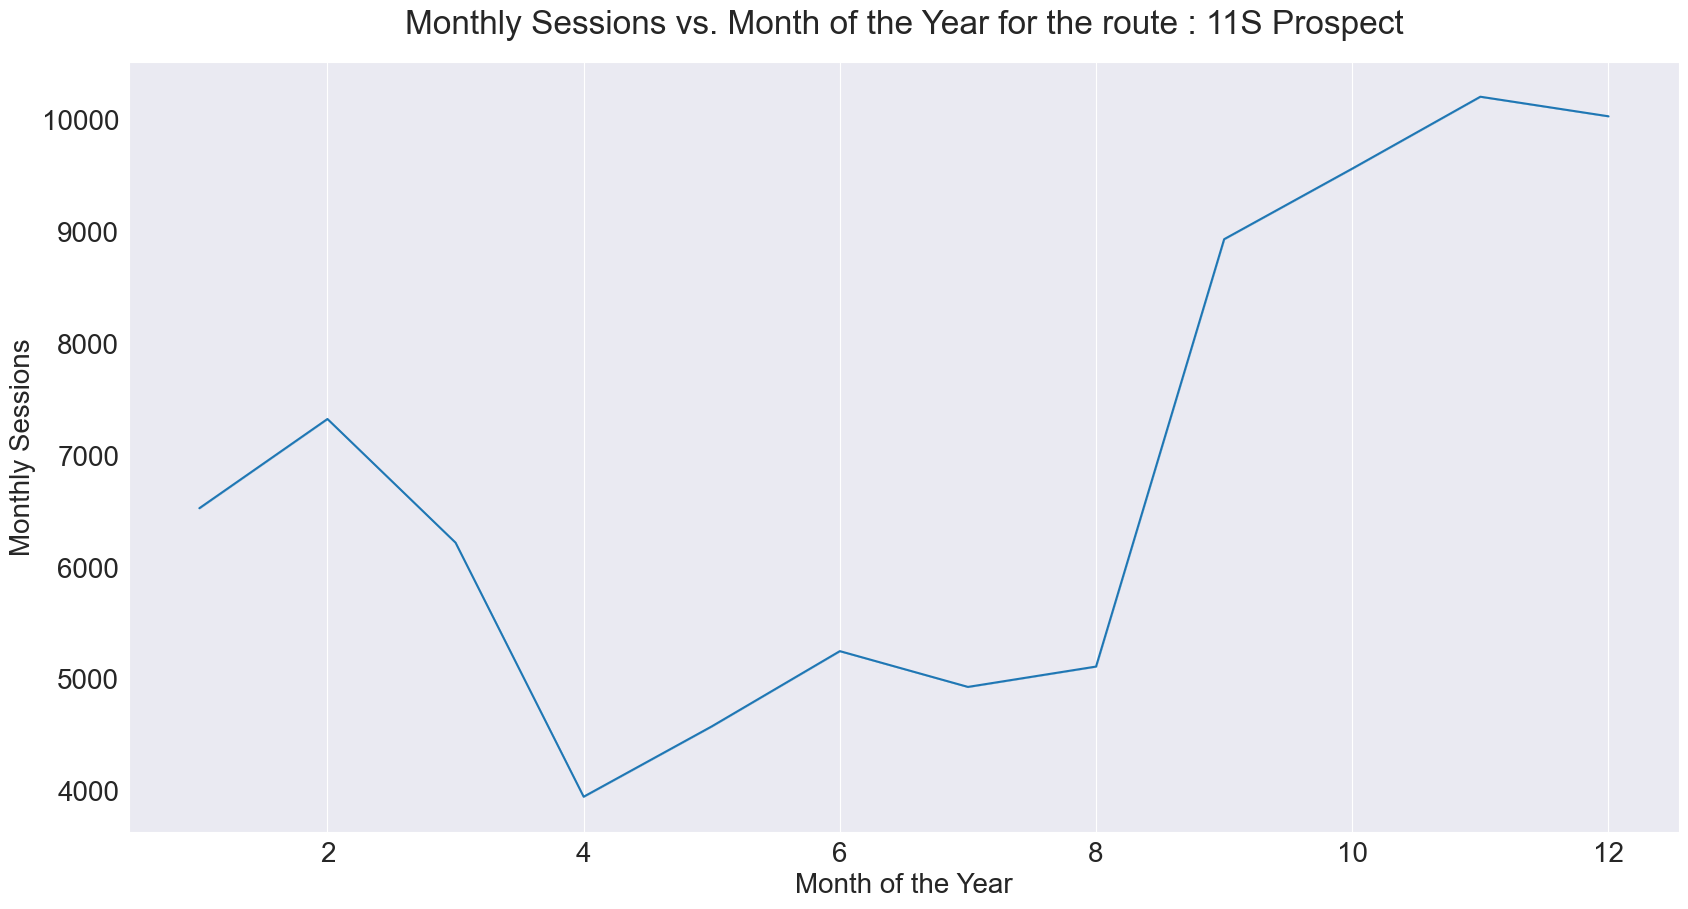

In [39]:
# Plot the monthly sessions vs. month of the year
plt.figure(figsize=(20, 10))
plt.rcParams.update({"font.size": 20})
plt.rcParams["axes.titlepad"] = 20
plt.title(f"Monthly Sessions vs. Month of the Year for the route : {route}")
# Smoothen the data by taking the average of the monthly sessions
sns.lineplot(x="month", y="total_sessions_monthly", data=route_specific_data, palette='Blues_d')
# Show grid lines, only on the y-axis
plt.grid(axis='y')
plt.ylabel("Monthly Sessions")
plt.xlabel("Month of the Year")
plt.show()

In [48]:
route_specific_data[['week_of_year', 'total_sessions_weekly']].drop_duplicates().sort_values("week_of_year").reset_index(drop=True)

,week_of_year,total_sessions_weekly
0,1,843
1,2,1569
2,3,1570
3,4,1548
4,5,1750
5,6,1952
6,7,1944
7,8,1649
8,9,1903
9,10,1444


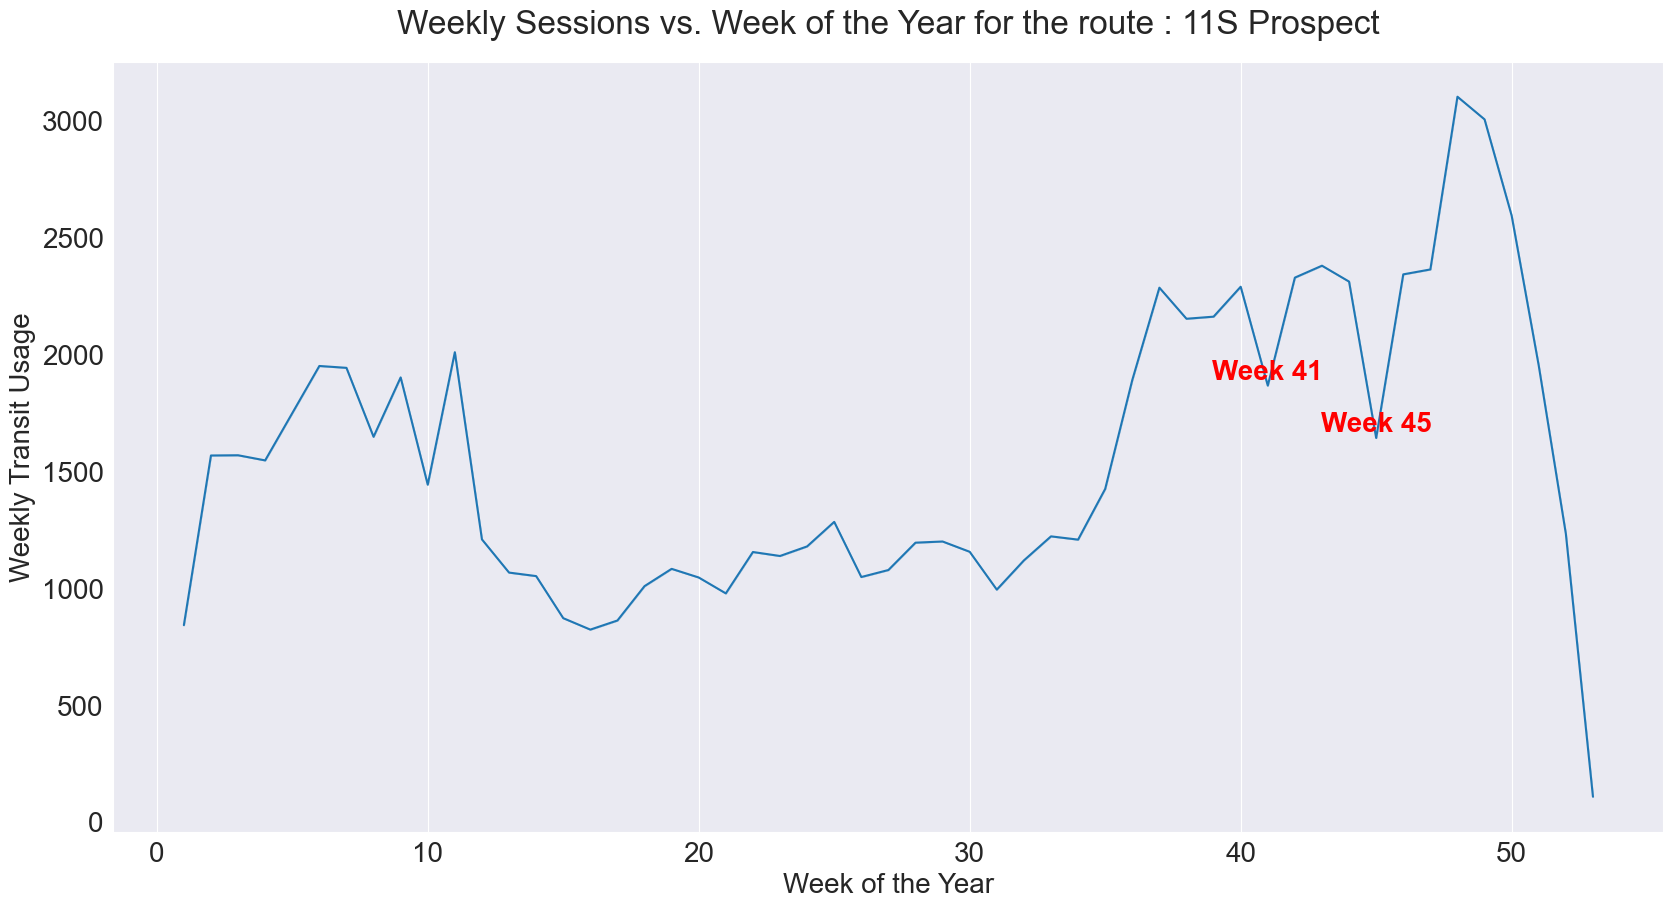

In [50]:
# Plot the monthly sessions vs. month of the year
plt.figure(figsize=(20, 10))
plt.rcParams.update({"font.size": 20})
plt.rcParams["axes.titlepad"] = 20
plt.title(f"Weekly Sessions vs. Week of the Year for the route : {route}")
sns.lineplot(x="week_of_year", y="total_sessions_weekly", data=route_specific_data, palette='Blues_d')
# Annotate the low points after week 40, where ever there was a decrease in the number of sessions:
# Week 41, 45
# The co-ordinates are x and y as shown in the plot
plt.annotate(
    "Week 41",
    xy=(41, 0),
    xytext=(41, route_specific_data[route_specific_data['week_of_year'] == 41]['total_sessions_weekly'].values[0]),
    textcoords="data",
    ha="center",
    va="bottom",
    fontsize=20,
    weight='bold',
    color='red'
)
plt.annotate(
    "Week 45",
    xy=(45, 0),
    xytext=(45, route_specific_data[route_specific_data['week_of_year'] == 45]['total_sessions_weekly'].values[0]),
    textcoords="data",
    ha="center",
    va="bottom",
    fontsize=20,
    weight='bold',
    color='red'
)


# Show grid lines, only on the y-axis
plt.grid(axis='y')
plt.ylabel("Weekly Transit Usage")
plt.xlabel("Week of the Year")
plt.show()

REGRESSION MODELLING

SARIMA - Seasonal Auto-Regressive Integrated Moving Average can be used to forecast the number of transit users for the next 30 days. This is the best basic model for capturing the seasonality in the data. And since, we are using just the date to make predictions, this is the best model to use.

In [ ]:
# Extract the Data for just the route and aggregate the data by date
route_specific_data = transit_weather_data[transit_weather_data['route'].str.contains(route)]
# Aggregation should be done by the day of the week, and month of the year to capture the seasonality in the data
route_specific_data = route_specific_data.groupby(['date', 'day_of_week', 'month_of_year']).agg({'total_sessions_daily': 'mean'}).reset_index()

In [ ]:
# STEP 2: REGRESSION MODELLING
# STEP 2.1: SARIMA
# Import the necessary libraries for SARIMA
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit the SARIMA Model
# Define the model
model = SARIMAX(
    y_train,
    exog=X_train,
    order=(2, 1, 4),
    seasonal_order=(1, 1, 1, 12),
    trend="c",
    enforce_invertibility=False,
)
# Fit the model
model_fit = model.fit()
# Print the model summary
print(model_fit.summary())

In [ ]:
# Predict the number of sessions for the next 30 days
y_pred = model_fit.forecast(steps=30, exog=X_test)
# Plot the actual vs. predicted values
plt.figure(figsize=(20, 10))
plt.rcParams.update({"font.size": 20})
plt.rcParams["axes.titlepad"] = 20
plt.title("Actual vs. Predicted Values for SARIMA Model")
plt.plot(y_test.values, label="Actual", color="blue")
plt.plot(y_pred.values, label="Predicted", color="orange")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Total Sessions Daily")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm.notebook import tqdm
import itertools
import numpy as np
from sklearn.metrics import mean_squared_error

# Define the range of hyperparameters to test
p = d = q = range(0, 3)  # ARIMA parameters
P = D = Q = range(0, 2)  # Seasonal parameters
s = [12]  # Seasonal step

# Generate all different combinations of p, d, q, P, D, Q and s
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s[0]) for x in list(itertools.product(P, D, Q))]

# Grid search over parameter combinations
best_rmse = float('inf')
best_cfg = None

for param in tqdm(pdq):
    for param_seasonal in tqdm(seasonal_pdq, leave=False):
        try:
            model = SARIMAX(y_train, exog=X_train, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)
            model_fit = model.fit(disp=False)
            # In-sample prediction with one-step ahead forecasting
            y_pred = model_fit.get_prediction(start=-11, end=-1, exog=X_test[:11], dynamic=False).predicted_mean
            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(y_test[-11:], y_pred))
            if rmse < best_rmse:
                best_rmse = rmse
                best_cfg = (param, param_seasonal)
        except:
            continue

# Output the best RMSE and the best configurations
print('Best SARIMA model RMSE: {:.4f}'.format(best_rmse))

In [ ]:
# BEST CONFIGURATION
print('Best SARIMA model configuration: {}'.format(best_cfg))
# Train the SARIMA Model with the best configuration
# Define the model
model = SARIMAX(
    y_train,
    exog=X_train,
    order=(2, 1, 4),
    seasonal_order=(1, 1, 1, 12),
    trend="c",
    enforce_invertibility=False,
)
# Fit the model
model_fit = model.fit()
# Print the model summary
print(model_fit.summary())
# Predict the number of sessions for the next 30 days
y_pred = model_fit.forecast(steps=30, exog=X_test)
# Plot the actual vs. predicted values
plt.figure(figsize=(20, 10))
plt.rcParams.update({"font.size": 20})
plt.rcParams["axes.titlepad"] = 20
plt.title("Actual vs. Predicted Values for SARIMA Model")
plt.plot(y_test.values, label="Actual", color="blue")
plt.plot(y_pred.values, label="Predicted", color="orange")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Total Sessions Daily")
plt.show()

In [ ]:
# Evaluate Model Performance using RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
print(f"RMSE as a Percentage of the Mean: {round((rmse / y_test.mean()) * 100, 2)}%")
# Accuracy can be interpreted as the percentage of correct predictions
# Calculate the Accuracy
accuracy = 100 - (rmse / y_test.mean()) * 100
print(f"Accuracy: {round(accuracy, 2)}%")